In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('jumping_jacks.json')

In [4]:
df.sensorId.unique()

array(['LSM6DSV Accelerometer', 'Rotation Vector Sensor',
       'Orientation Sensor', 'LSM6DSV Gyroscope'], dtype=object)

In [5]:
df.sensorType.unique()

array([ 1, 11,  3,  4])

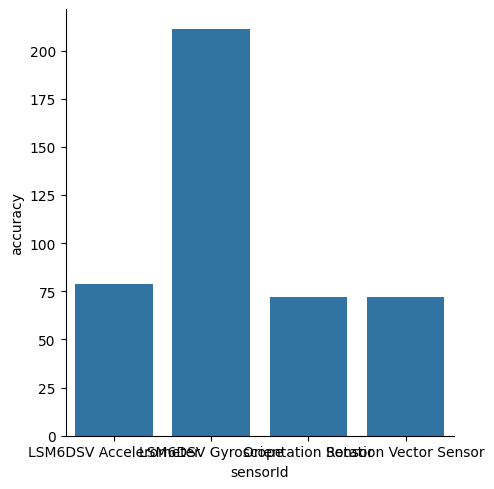

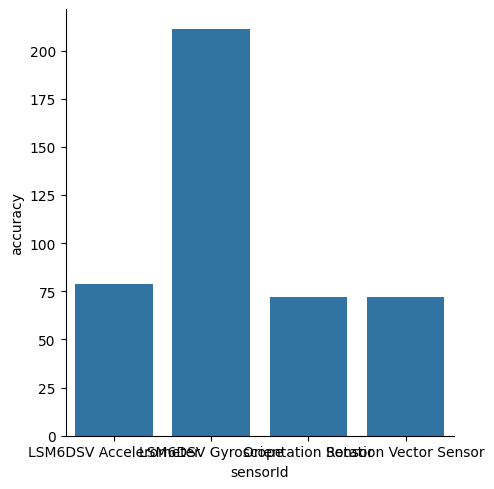

In [6]:
sns.catplot(df.groupby('sensorId').count()['accuracy'], kind="bar")
sns.catplot(df.groupby('sensorId').count()['accuracy'], kind="bar")

In [7]:
df = df[df.sensorType!=11]

In [8]:
df[['X', 'Y', 'Z']] = pd.DataFrame(df['data'].tolist(), index=df.index)

In [9]:
gyroscope_df = df[df.sensorType == 4]
accelerometer_df = df[df.sensorType == 1]
orientation_df = df[df.sensorType == 3]

In [10]:
gyroscope_df = gyroscope_df.reset_index()
gyroscope_df.drop('index', axis=1, inplace=True)
accelerometer_df = accelerometer_df.reset_index()
accelerometer_df.drop('index', axis=1, inplace=True)
orientation_df = orientation_df.reset_index()
orientation_df.drop('index', axis=1, inplace=True)

<Axes: >

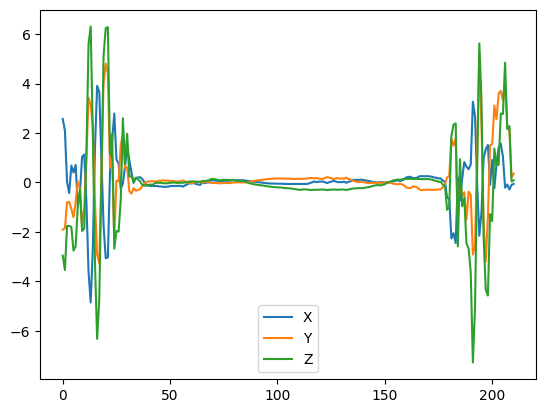

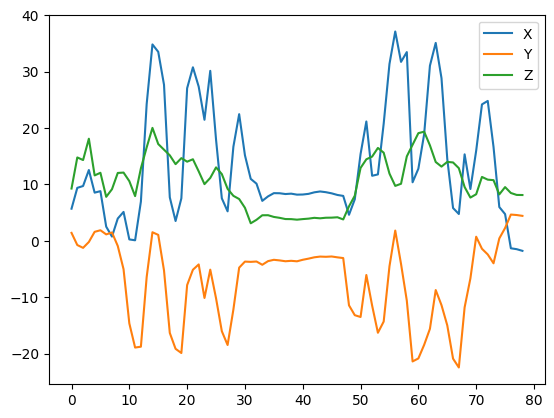

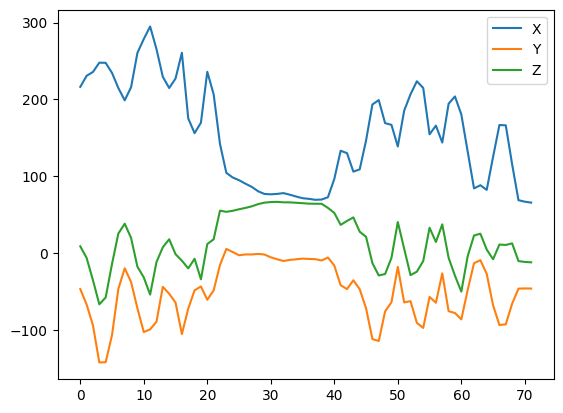

In [11]:
window = 3
gyroscope_df[['X', 'Y', 'Z']].rolling(window, min_periods=1, center=True).mean().plot()
accelerometer_df[['X', 'Y', 'Z']].rolling(window, min_periods=1, center=True).mean().plot()
orientation_df[['X', 'Y', 'Z']].rolling(window, min_periods=1, center=True).mean().plot()

<Axes: >

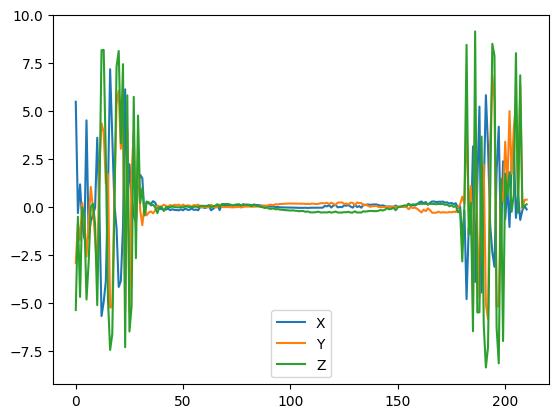

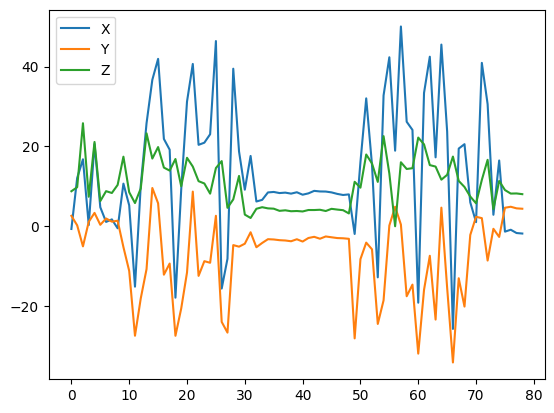

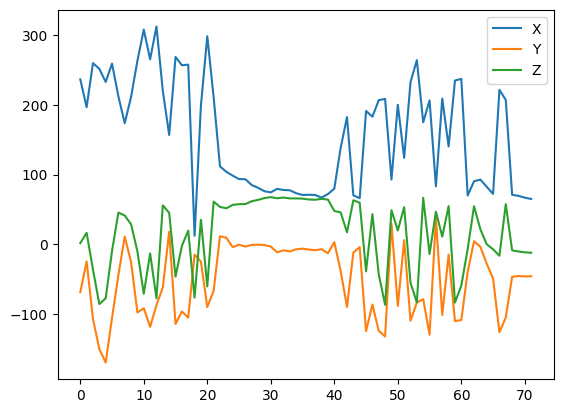

In [12]:
gyroscope_df[['X', 'Y', 'Z']].plot()
accelerometer_df[['X', 'Y', 'Z']].plot()
orientation_df[['X', 'Y', 'Z']].plot()

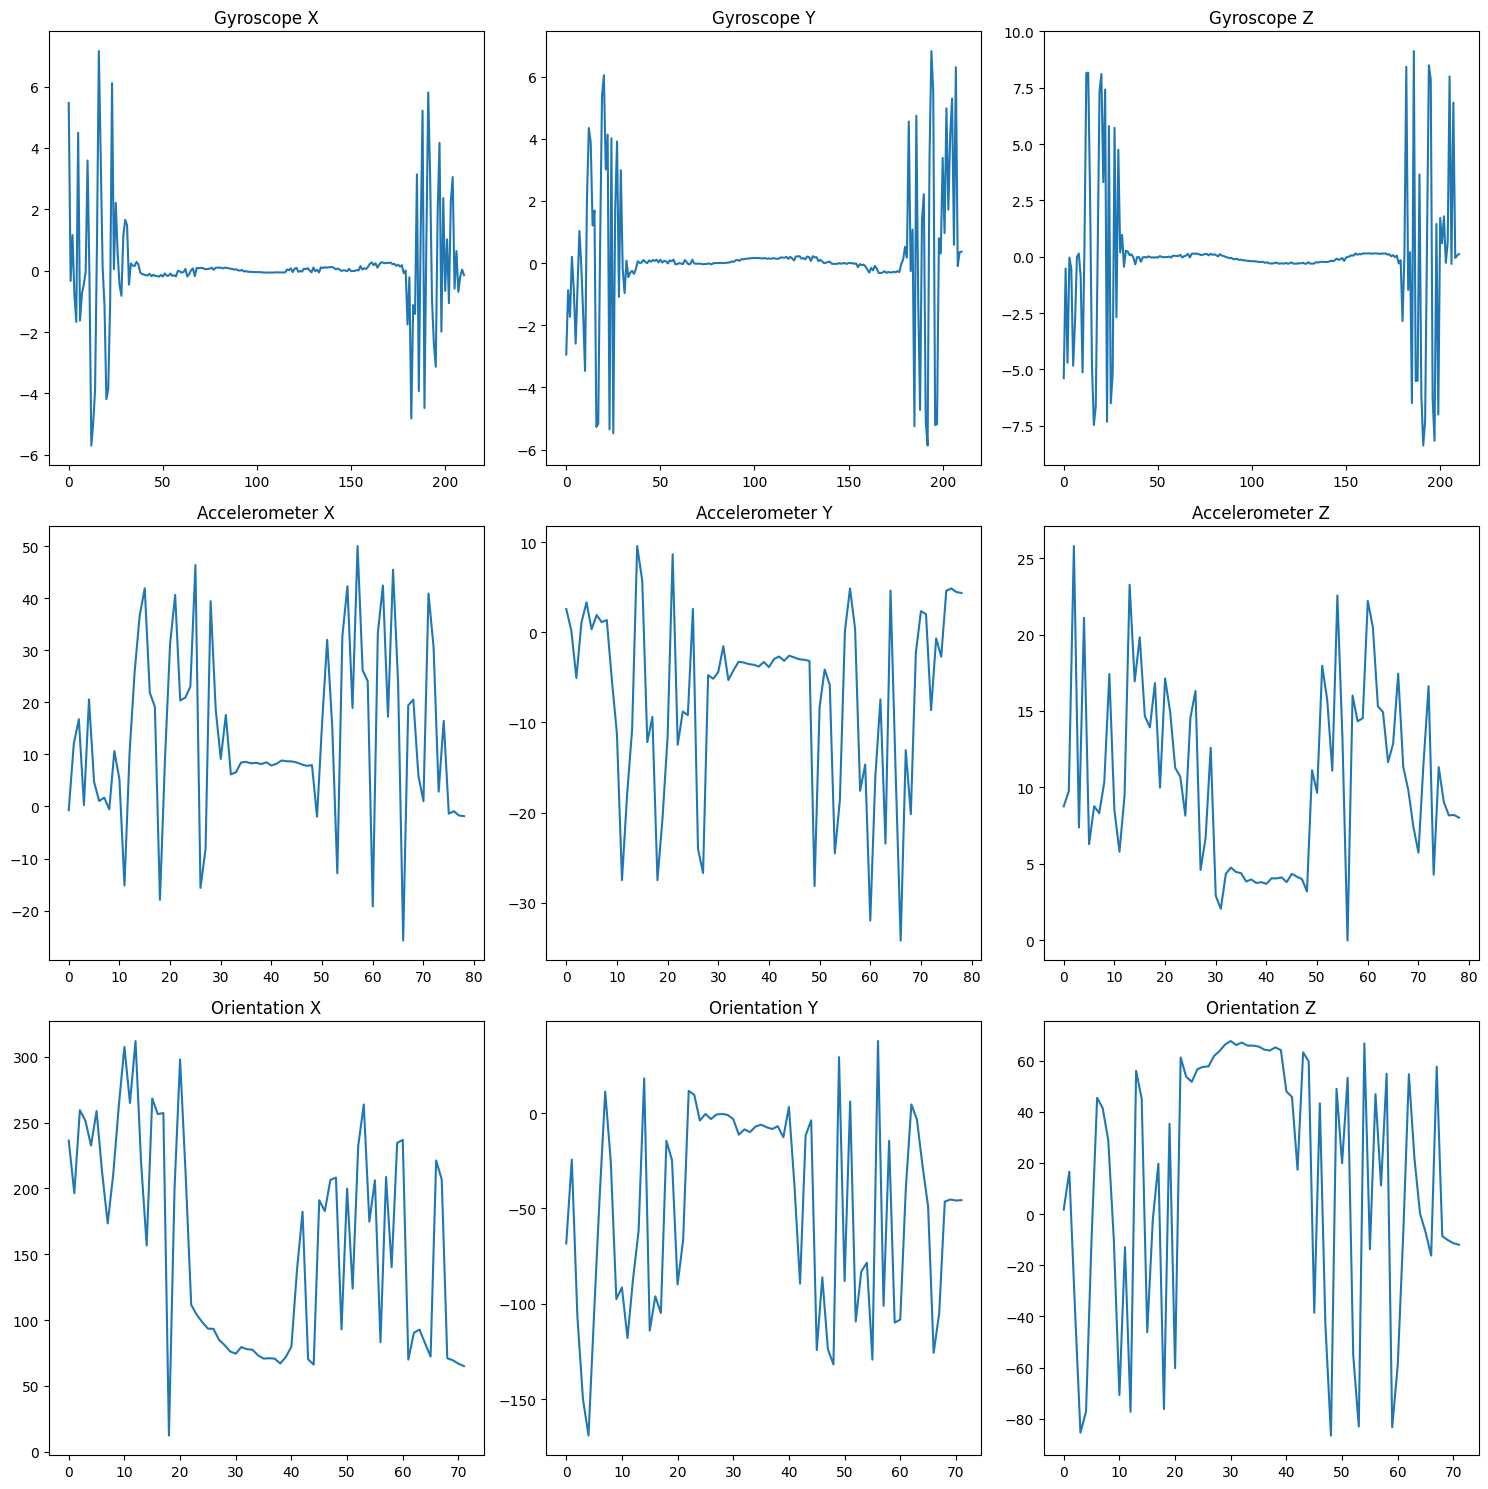

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plotting gyroscope data
gyroscope_df['X'].plot(ax=axs[0, 0], title='Gyroscope X')
gyroscope_df['Y'].plot(ax=axs[0, 1], title='Gyroscope Y')
gyroscope_df['Z'].plot(ax=axs[0, 2], title='Gyroscope Z')

# Plotting accelerometer data
accelerometer_df['X'].plot(ax=axs[1, 0], title='Accelerometer X')
accelerometer_df['Y'].plot(ax=axs[1, 1], title='Accelerometer Y')
accelerometer_df['Z'].plot(ax=axs[1, 2], title='Accelerometer Z')

# Plotting orientation data
orientation_df['X'].plot(ax=axs[2, 0], title='Orientation X')
orientation_df['Y'].plot(ax=axs[2, 1], title='Orientation Y')
orientation_df['Z'].plot(ax=axs[2, 2], title='Orientation Z')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

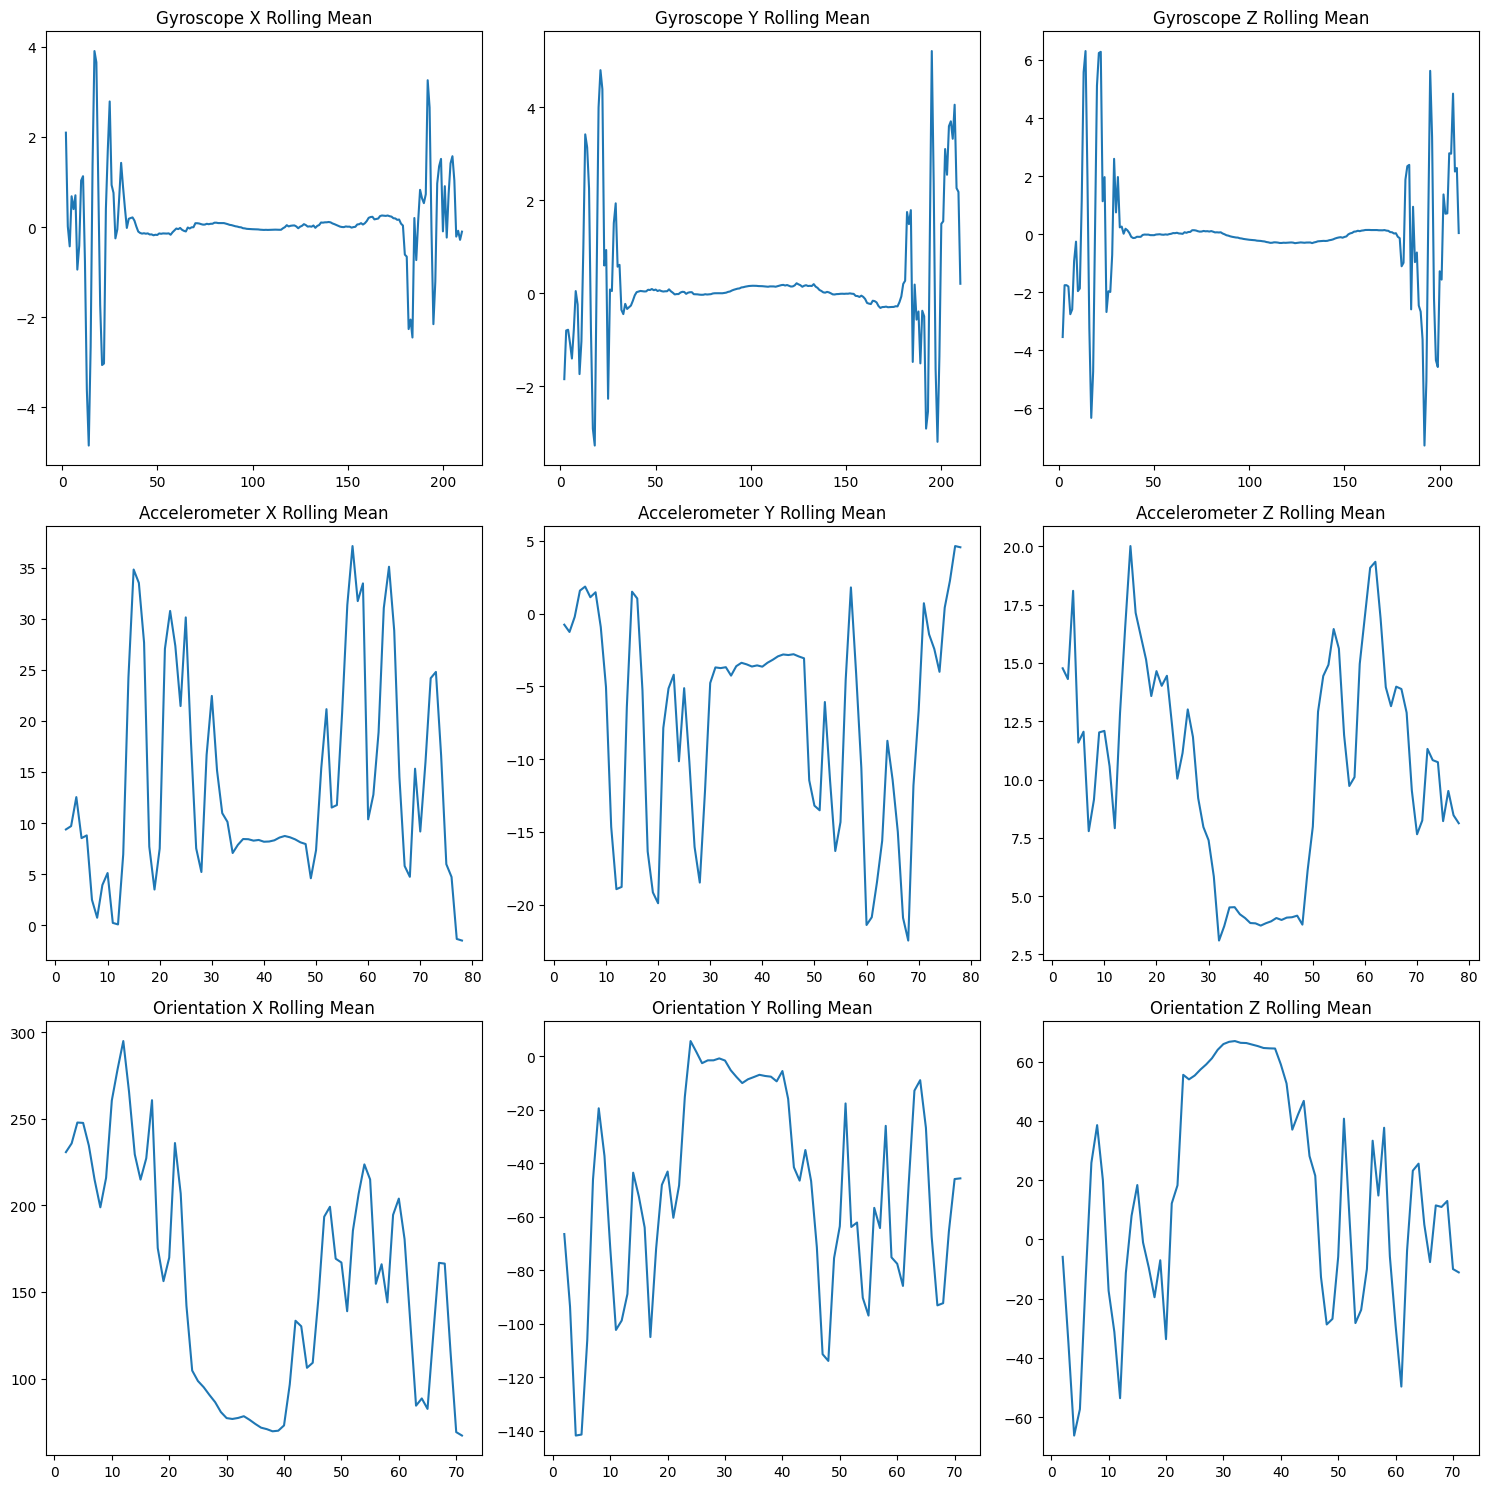

In [14]:
# Compute rolling means
gyroscope_df_rolling = gyroscope_df[['X', 'Y', 'Z']].rolling(window=3).mean()
accelerometer_df_rolling = accelerometer_df[['X', 'Y', 'Z']].rolling(window=3).mean()
orientation_df_rolling = orientation_df[['X', 'Y', 'Z']].rolling(window=3).mean()

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plotting gyroscope data
gyroscope_df_rolling['X'].plot(ax=axs[0, 0], title='Gyroscope X Rolling Mean')
gyroscope_df_rolling['Y'].plot(ax=axs[0, 1], title='Gyroscope Y Rolling Mean')
gyroscope_df_rolling['Z'].plot(ax=axs[0, 2], title='Gyroscope Z Rolling Mean')

# Plotting accelerometer data
accelerometer_df_rolling['X'].plot(ax=axs[1, 0], title='Accelerometer X Rolling Mean')
accelerometer_df_rolling['Y'].plot(ax=axs[1, 1], title='Accelerometer Y Rolling Mean')
accelerometer_df_rolling['Z'].plot(ax=axs[1, 2], title='Accelerometer Z Rolling Mean')

# Plotting orientation data
orientation_df_rolling['X'].plot(ax=axs[2, 0], title='Orientation X Rolling Mean')
orientation_df_rolling['Y'].plot(ax=axs[2, 1], title='Orientation Y Rolling Mean')
orientation_df_rolling['Z'].plot(ax=axs[2, 2], title='Orientation Z Rolling Mean')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

0 0
0 0
0 0
6 0
0 4
3 0
7 0
0 8
7 7


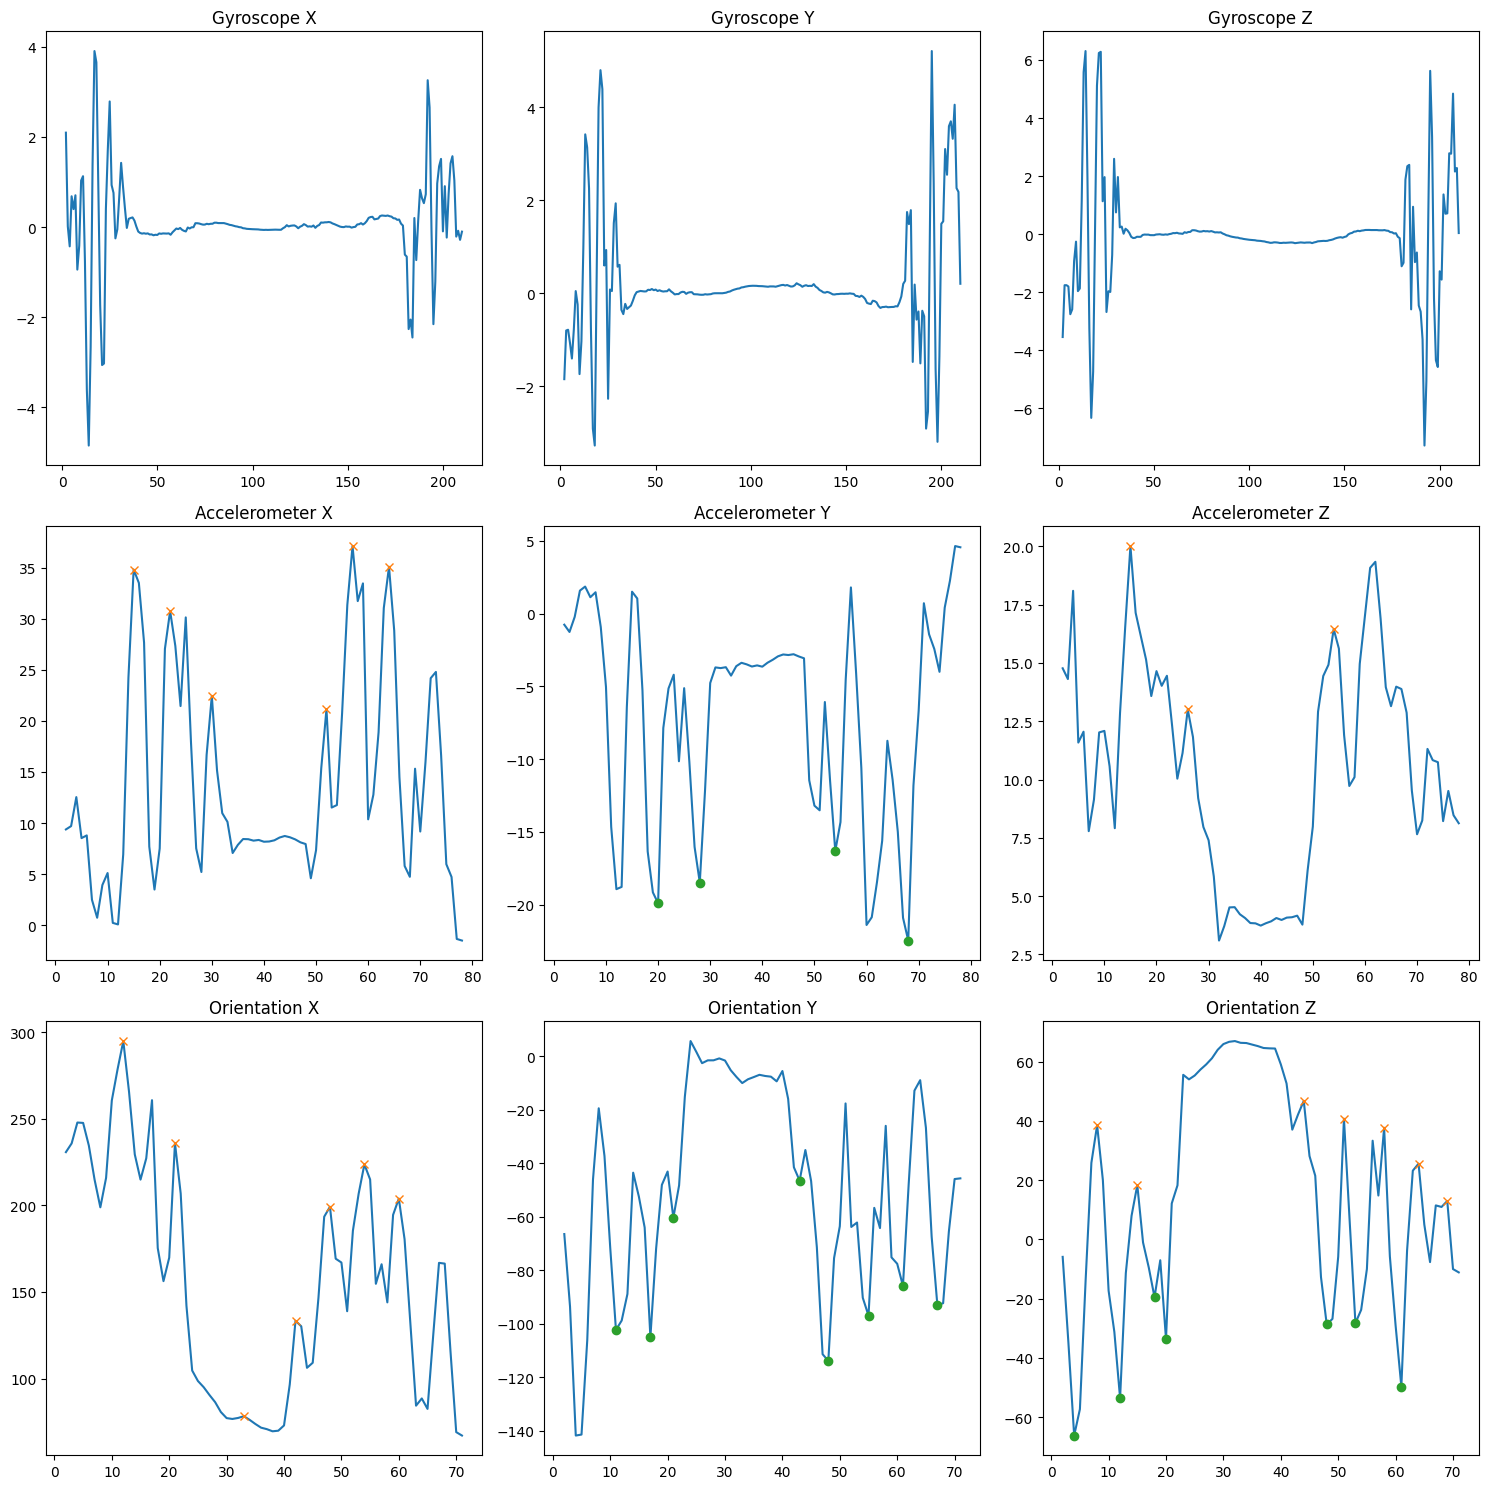

In [30]:
from scipy.signal import find_peaks

# Detect peaks and troughs
def detect_peaks_and_troughs(data):
    peaks, _ = find_peaks(data, width=1, prominence = 0, height=10, threshold=0.7)
    troughs, _ = find_peaks(-data, width=1, prominence = 0.8, height=10, threshold=0.7)
    return peaks, troughs

# Create plots with peaks and troughs
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Helper function to plot data with peaks and troughs
def plot_with_peaks_and_troughs(ax, data, title):
    ax.plot(data)
    peaks, troughs = detect_peaks_and_troughs(data)
    print(len(peaks), len(troughs))
    ax.plot(peaks, data[peaks], "x")
    ax.plot(troughs, data[troughs], "o")
    ax.set_title(title)

# Plotting gyroscope data
plot_with_peaks_and_troughs(axs[0, 0], gyroscope_df_rolling['X'], 'Gyroscope X')
plot_with_peaks_and_troughs(axs[0, 1], gyroscope_df_rolling['Y'], 'Gyroscope Y')
plot_with_peaks_and_troughs(axs[0, 2], gyroscope_df_rolling['Z'], 'Gyroscope Z')

# Plotting accelerometer data
plot_with_peaks_and_troughs(axs[1, 0], accelerometer_df_rolling['X'], 'Accelerometer X')
plot_with_peaks_and_troughs(axs[1, 1], accelerometer_df_rolling['Y'], 'Accelerometer Y')
plot_with_peaks_and_troughs(axs[1, 2], accelerometer_df_rolling['Z'], 'Accelerometer Z')

# Plotting orientation data
plot_with_peaks_and_troughs(axs[2, 0], orientation_df_rolling['X'], 'Orientation X')
plot_with_peaks_and_troughs(axs[2, 1], orientation_df_rolling['Y'], 'Orientation Y')
plot_with_peaks_and_troughs(axs[2, 2], orientation_df_rolling['Z'], 'Orientation Z')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Axes: >

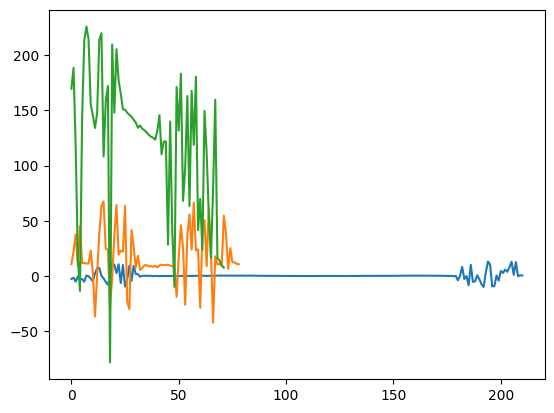

In [16]:
gyroscope_df[['X', 'Y', 'Z']].sum(axis=1).plot()
accelerometer_df[['X', 'Y', 'Z']].sum(axis=1).plot()
orientation_df[['X', 'Y', 'Z']].sum(axis=1).plot()

In [17]:
gyroscope_df[['X', 'Y', 'Z']].sum(axis=1)

0      -2.865569
1      -1.736232
2      -5.275890
3      -0.610407
4      -3.018591
         ...    
206     0.908815
207    12.448212
208    -0.341626
209     0.432340
210     0.341474
Length: 211, dtype: float64

<Axes: >

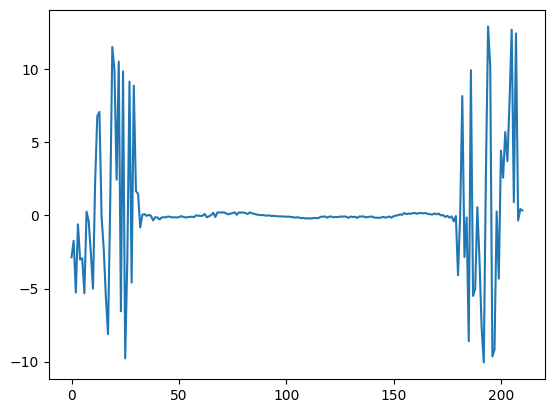

In [18]:
(gyroscope_df['X'] + gyroscope_df['Y'] + gyroscope_df['Z']).plot()